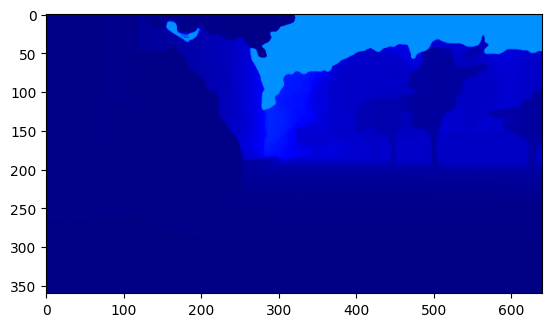

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

depthmap_path = "/home/kitech/objdect/CenterPoint/data/kitech/rgbd/011045_d.png"
max_range = 255

depthmap = cv2.imread(depthmap_path, cv2.IMREAD_UNCHANGED)

# 실제 depthmap이 저장된 방식에 맞게 depth 복원하여 사용하면 됩니다.
depthmap = depthmap.astype(np.float32) / 255.0
# depthmap = depthmap.astype(np.float32) * max_range / 65535

def get_color_depthmap(depthmap, max_range):
    # 256 단계의 color map을 생성합니다.
    cmap = plt.cm.get_cmap("jet", 256)
    cmap = np.array([cmap(i) for i in range(256)])[:, :3] * 255

    # sparse depthmap인 경우 depth가 있는 곳만 추출합니다.
    depth_pixel_v_s, depth_pixel_u_s = np.where(depthmap > 0)

    H, W = depthmap.shape
    color_depthmap = np.zeros((H, W, 3)).astype(np.uint8)
    for depth_pixel_v, depth_pixel_u in zip(depth_pixel_v_s, depth_pixel_u_s):
        depth = depthmap[depth_pixel_v, depth_pixel_u]
        color_index = int(255 * min(depth, max_range) / max_range)
        color = cmap[color_index, :]
        cv2.circle(color_depthmap, (depth_pixel_u, depth_pixel_v), 1, color=tuple(color), thickness=-1)
    
    return color_depthmap

plt.imshow(get_color_depthmap(depthmap, max_range))
plt.show()

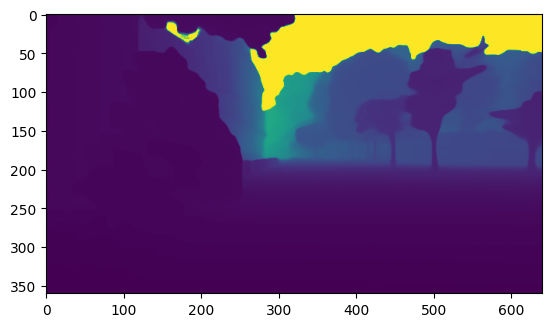

In [8]:
plt.imshow(depthmap)